# Data Visualization

In [4]:
import os
os.chdir('projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns')

### Example 1:

Display the count of Pokémon introduced in each generation using **bar chart** with the 'generation_id' column.

In [5]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [6]:
pokemon.generation_id.unique()

array([1, 2, 3, 4, 5, 6, 7])

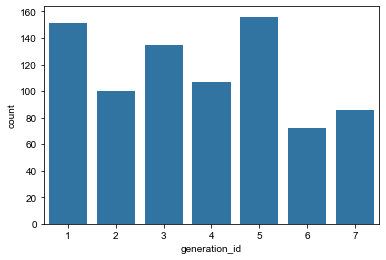

In [9]:
base_color = sns.color_palette()[0]

sns.countplot(data=pokemon, x='generation_id', color=base_color);

### Example 2:

Using **bar chart**, display the total count of Pokémon based on _type_.

_Notice:_ Each Pokémon species has either type_1, type_2 or both types that play a part in its offensive and defensive capabilities.

**STEPS:**

1. Select the `id`, and `species` columns from pokemon. 
2. Remove the `type_1`, `type_2` columns from pokemon
3. Add a new column `type_level` that can have a value either `type_1` or `type_2`
4. Add another column `type` that will contain the actual value contained in the `type_1`, `type_2` columns. 

In [29]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [31]:
# reconstruct and integrate the type_1 and type_2 columns
pkmn_types = pd.melt(pokemon, \
                     id_vars=['species'], \
                     value_vars=['type_1', 'type_2'], \
                     var_name='type_level', \
                     value_name='type', )

# drop the nulls. `drop=True` means not insert the original index into feature cols.
pkmn_types = pkmn_types.dropna().reset_index(drop=True)
pkmn_types.head()

,species,type_level,type
0,bulbasaur,type_1,grass
1,ivysaur,type_1,grass
2,venusaur,type_1,grass
3,charmander,type_1,fire
4,charmeleon,type_1,fire


In [32]:
pkmn_types

,species,type_level,type
0,bulbasaur,type_1,grass
1,ivysaur,type_1,grass
2,venusaur,type_1,grass
3,charmander,type_1,fire
4,charmeleon,type_1,fire
...,...,...,...
1207,magearna,type_2,fairy
1208,marshadow,type_2,ghost
1209,naganadel,type_2,dragon
1210,stakataka,type_2,steel


In [33]:
# the rows will be expanded as 2 time as the original
print("Before melt: {0}. After melt: {1}".format(pokemon.shape, pkmn_types.shape))

Before melt: (807, 14). After melt: (1212, 3)


In [36]:
# Display the frequency of each type.
print('The frequency of each type is:\n', pkmn_types['type_level'].value_counts(), sep='')

The frequency of each type is:
type_1    807
type_2    405
Name: type_level, dtype: int64


In [38]:
# get order of bars by frequency
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [39]:
type_order = type_counts.index.values
type_order

array(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'], dtype=object)

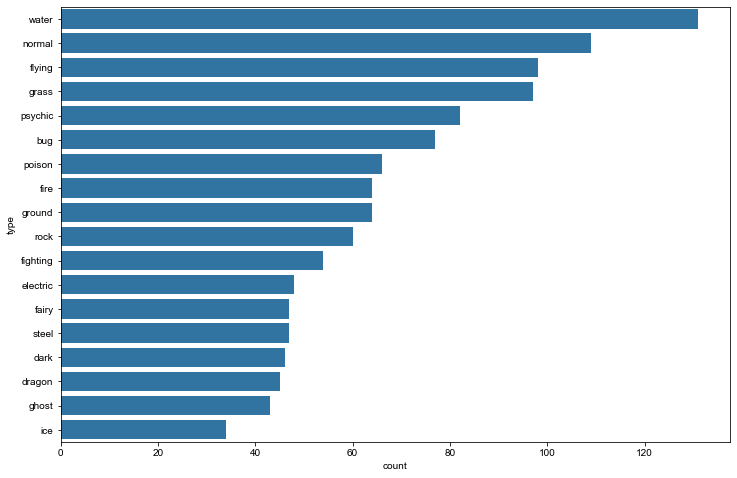

In [43]:
plt.figure(figsize=(12,8))

base_color = sns.color_palette()[0]

sns.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

___Variations___:

Create a relative frequency plot of the proportion of Pokémon with each type, sorted from most frequent to least.

**Notice:** The sum across bars should be greater than 100%, since many Pokémon have two types. (Which means the denominator should be the sum of `id`s, but not `type`)

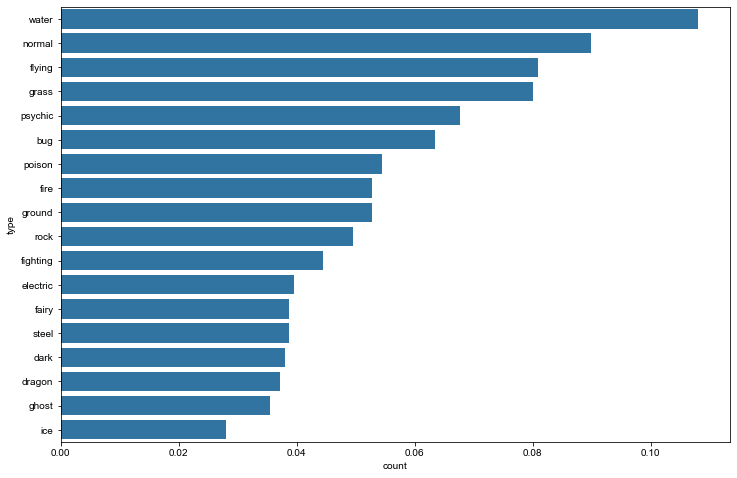

In [47]:
# Compute largest proportion
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

# establish tick locations and create plot
base_color = sns.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(12,8))
base_color = sns.color_palette()[0]
sns.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names);

In [ ]:
!jupyter nbconvert notebook_name.ipynb --to slides --post serve --no-input --no-prompt